# Envision lag measurements after heat shock
This script analyzes an experiment conducted on 11/13/2015 in which growth curves were measured after a heat shock for the clonal "parent" strain of experimentally evolved yeast lines. The data were initially intended to examine possible plate affects resulting from heat shocking samples on 96-well plates. Raw data are absorbance measurments taken every half hour for each well of each plate on the Weinreich lab Envision microplate reader. 

In [1]:
path = '/Users/chrisgraves/Documents/Yeast_data/Envision data/'
file = 'growth_after_HS_11132015_trimmed.csv'
library(segmented,lib.loc = "/Library/Frameworks/R.framework/Versions/3.2/Resources/library/")
library(ggplot2)
library(reshape2)
measurement_interval = 1/2  #measurement interval in hours

#######uploads data files into R
data = read.table(paste(path,file,sep=""),sep=",",header=T)
head(data)

,Plate,Well,CalcResult,CalcResult.1,CalcResult.2,CalcResult.3,CalcResult.4,CalcResult.5,CalcResult.6,CalcResult.7,CalcResult.8,CalcResult.9,CalcResult.10,CalcResult.11,CalcResult.12,CalcResult.13,CalcResult.14,CalcResult.15,CalcResult.16,CalcResult.17,CalcResult.18,CalcResult.19,CalcResult.20,CalcResult.21,CalcResult.22,CalcResult.23,CalcResult.24,CalcResult.25,CalcResult.26,CalcResult.27,CalcResult.28,CalcResult.29,CalcResult.30,CalcResult.31,CalcResult.32,CalcResult.33,CalcResult.34,CalcResult.35,CalcResult.36,CalcResult.37,CalcResult.38,CalcResult.39,CalcResult.40,CalcResult.41,CalcResult.42,CalcResult.43,CalcResult.44,CalcResult.45,CalcResult.46,CalcResult.47,CalcResult.48,CalcResult.49,CalcResult.50,CalcResult.51,CalcResult.52,CalcResult.53,CalcResult.54,CalcResult.55,CalcResult.56,CalcResult.57,CalcResult.58,CalcResult.59,CalcResult.60,CalcResult.61,CalcResult.62,CalcResult.63,CalcResult.64,CalcResult.65,CalcResult.66,CalcResult.67,CalcResult.68,CalcResult.69,CalcResult.70,CalcResult.71,CalcResult.72,CalcResult.73,CalcResult.74,CalcResult.75,CalcResult.76,CalcResult.77,CalcResult.78,CalcResult.79,CalcResult.80,CalcResult.81,CalcResult.82,CalcResult.83,CalcResult.84,CalcResult.85,CalcResult.86,CalcResult.87,CalcResult.88,CalcResult.89,CalcResult.90,CalcResult.91,CalcResult.92,CalcResult.93,CalcResult.94,CalcResult.95
1,1,A01,0.147,0.148,0.156,0.166,0.176,0.189,0.214,0.251,0.292,0.34,0.386,0.432,0.476,0.509,0.525,0.529,0.527,0.529,0.527,0.527,0.528,0.526,0.53,0.53,0.522,0.522,0.525,0.525,0.523,0.522,0.524,0.526,0.519,0.526,0.526,0.527,0.527,0.528,0.527,0.527,0.531,0.526,0.528,0.531,0.533,0.529,0.528,0.531,0.533,0.534,0.532,0.534,0.535,0.533,0.535,0.533,0.537,0.535,0.536,0.54,0.54,0.541,0.543,0.542,0.543,0.544,0.543,0.544,0.544,0.542,0.546,0.543,0.548,0.547,0.548,0.549,0.548,0.548,0.551,0.55,0.55,0.552,0.551,0.551,0.552,0.552,0.553,0.553,0.554,0.555,0.555,0.557,0.557,0.555,0.557,0.556
2,1,A02,0.142,0.143,0.159,0.182,0.185,0.2,0.223,0.256,0.293,0.334,0.378,0.418,0.463,0.499,0.514,0.516,0.518,0.518,0.519,0.517,0.518,0.517,0.517,0.517,0.51,0.51,0.512,0.513,0.509,0.51,0.513,0.513,0.507,0.513,0.513,0.514,0.513,0.512,0.512,0.511,0.514,0.513,0.513,0.514,0.517,0.515,0.511,0.515,0.517,0.518,0.517,0.514,0.521,0.516,0.52,0.519,0.52,0.518,0.518,0.522,0.521,0.524,0.523,0.521,0.523,0.522,0.524,0.523,0.524,0.526,0.527,0.526,0.528,0.526,0.53,0.527,0.528,0.526,0.528,0.527,0.528,0.531,0.528,0.529,0.529,0.528,0.528,0.531,0.532,0.531,0.531,0.531,0.533,0.53,0.533,0.53
3,1,A03,0.138,0.138,0.147,0.166,0.171,0.186,0.216,0.244,0.278,0.32,0.361,0.405,0.446,0.481,0.499,0.505,0.506,0.505,0.505,0.507,0.506,0.507,0.507,0.509,0.5,0.501,0.505,0.505,0.505,0.501,0.506,0.505,0.499,0.505,0.505,0.506,0.505,0.507,0.508,0.504,0.51,0.503,0.507,0.509,0.51,0.508,0.507,0.512,0.514,0.515,0.509,0.513,0.514,0.512,0.515,0.511,0.514,0.513,0.516,0.517,0.516,0.521,0.52,0.519,0.52,0.522,0.52,0.52,0.521,0.521,0.524,0.523,0.524,0.526,0.527,0.526,0.526,0.526,0.528,0.527,0.526,0.528,0.528,0.527,0.528,0.528,0.529,0.53,0.528,0.529,0.532,0.532,0.532,0.53,0.532,0.53
4,1,A04,0.135,0.135,0.144,0.156,0.161,0.177,0.198,0.223,0.256,0.295,0.339,0.378,0.423,0.461,0.492,0.504,0.503,0.505,0.503,0.503,0.503,0.504,0.503,0.505,0.499,0.5,0.502,0.501,0.5,0.5,0.501,0.504,0.498,0.502,0.501,0.506,0.504,0.504,0.506,0.506,0.506,0.504,0.509,0.507,0.509,0.506,0.506,0.509,0.512,0.513,0.51,0.51,0.513,0.513,0.514,0.51,0.513,0.515,0.515,0.516,0.517,0.518,0.521,0.519,0.518,0.521,0.521,0.522,0.522,0.521,0.526,0.521,0.521,0.525,0.528,0.526,0.525,0.526,0.527,0.528,0.528,0.53,0.528,0.529,0.528,0.529,0.529,0.53,0.529,0.531,0.532,0.533,0.533,0.532,0.531,0.533
5,1,A05,0.134,0.133,0.148,0.153,0.168,0.179,0.204,0.238,0.273,0.312,0.355,0.398,0.441,0.47,0.484,0.489,0.489,0.491,0.491,0.489,0.49,0.488,0.492,0.491,0.484,0.486,0.487,0.486,0.487,0.485,0.487,0.49,0.482,0.488,0.49,0.49,0.489,0.491,0.492,0.488,0.491,0.487,0.49,0.495,0.493,0.491,0.488,0.494,0.494,0.497,0.495,0.494,0.498,0.496,0.497,0.494,0.501,0.498,0.499,0.50

In [2]:
#######splits the well number into two rows with indexes for plate row and column 
well_coords = matrix(nrow=dim(data)[1],ncol = 2)
colnames(well_coords)=c('row','col')
for (k in 1:dim(data)[1]){
  well_coords[k,1] = unlist(strsplit(as.character(data$Well[k]),""))[1]
  cols = unlist(strsplit(as.character(data$Well[k]),""))[2:3]
  well_coords[k,2] = (paste(cols[1],cols[2],sep=""))
}
data[2] = NULL
data$row = as.factor(well_coords[,1])
data$col = as.factor(well_coords[,2])
colnames(data)= c('plate',as.character(c((0:(dim(data)[2]-4)))),'row','col')




#identifies blanks and removes from df
blank1 = c('C','03')
blank2 = c('F','08')
blanks = subset(data,(data$row==blank1[1]&data$col==blank1[2])|(data$row==blank2[1]&data$col==blank2[2]))
blanks = subset(blanks,blanks$plate!=1|blanks$row!='C') #removes a blank from plate 1 that appears to have been datataminated
data = subset(data,(!(data$row==blank1[1]&data$col==blank1[2]))&(!(data$row==blank2[1]&data$col==blank2[2])))

#subtracts background
mean_blank = mean(colMeans(blanks[,2:(dim(blanks)[2]-2)]))
data[,(2:(dim(data)[2]-2))] = data[,(2:(dim(data)[2]-2))] - mean_blank

head(data)

,plate,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,row,col
1,1,0.1034598,0.1044598,0.1124598,0.1224598,0.1324598,0.1454598,0.1704598,0.2074598,0.2484598,0.2964598,0.3424598,0.3884598,0.4324598,0.4654598,0.4814598,0.4854598,0.4834598,0.4854598,0.4834598,0.4834598,0.4844598,0.4824598,0.4864598,0.4864598,0.4784598,0.4784598,0.4814598,0.4814598,0.4794598,0.4784598,0.4804598,0.4824598,0.4754598,0.4824598,0.4824598,0.4834598,0.4834598,0.4844598,0.4834598,0.4834598,0.4874598,0.4824598,0.4844598,0.4874598,0.4894598,0.4854598,0.4844598,0.4874598,0.4894598,0.4904598,0.4884598,0.4904598,0.4914598,0.4894598,0.4914598,0.4894598,0.4934598,0.4914598,0.4924598,0.4964598,0.4964598,0.4974598,0.4994598,0.4984598,0.4994598,0.5004598,0.4994598,0.5004598,0.5004598,0.4984598,0.5024598,0.4994598,0.5044598,0.5034598,0.5044598,0.5054598,0.5044598,0.5044598,0.5074598,0.5064598,0.5064598,0.5084598,0.5074598,0.5074598,0.5084598,0.5084598,0.5094598,0.5094598,0.5104598,0.5114598,0.5114598,0.5134598,0.5134598,0.5114598,0.5134598,0.5124598,A,01
2,1,0.09845982,0.09945982,0.1154598,0.1384598,0.1414598,0.1564598,0.1794598,0.2124598,0.2494598,0.2904598,0.3344598,0.3744598,0.4194598,0.4554598,0.4704598,0.4724598,0.4744598,0.4744598,0.4754598,0.4734598,0.4744598,0.4734598,0.4734598,0.4734598,0.4664598,0.4664598,0.4684598,0.4694598,0.4654598,0.4664598,0.4694598,0.4694598,0.4634598,0.4694598,0.4694598,0.4704598,0.4694598,0.4684598,0.4684598,0.4674598,0.4704598,0.4694598,0.4694598,0.4704598,0.4734598,0.4714598,0.4674598,0.4714598,0.4734598,0.4744598,0.4734598,0.4704598,0.4774598,0.4724598,0.4764598,0.4754598,0.4764598,0.4744598,0.4744598,0.4784598,0.4774598,0.4804598,0.4794598,0.4774598,0.4794598,0.4784598,0.4804598,0.4794598,0.4804598,0.4824598,0.4834598,0.4824598,0.4844598,0.4824598,0.4864598,0.4834598,0.4844598,0.4824598,0.4844598,0.4834598,0.4844598,0.4874598,0.4844598,0.4854598,0.4854598,0.4844598,0.4844598,0.4874598,0.4884598,0.4874598,0.4874598,0.4874598,0.4894598,0.4864598,0.4894598,0.4864598,A,02
3,1,0.09445982,0.09445982,0.1034598,0.1224598,0.1274598,0.1424598,0.1724598,0.2004598,0.2344598,0.2764598,0.3174598,0.3614598,0.4024598,0.4374598,0.4554598,0.4614598,0.4624598,0.4614598,0.4614598,0.4634598,0.4624598,0.4634598,0.4634598,0.4654598,0.4564598,0.4574598,0.4614598,0.4614598,0.4614598,0.4574598,0.4624598,0.4614598,0.4554598,0.4614598,0.4614598,0.4624598,0.4614598,0.4634598,0.4644598,0.4604598,0.4664598,0.4594598,0.4634598,0.4654598,0.4664598,0.4644598,0.4634598,0.4684598,0.4704598,0.4714598,0.4654598,0.4694598,0.4704598,0.4684598,0.4714598,0.4674598,0.4704598,0.4694598,0.4724598,0.4734598,0.4724598,0.4774598,0.4764598,0.4754598,0.4764598,0.4784598,0.4764598,0.4764598,0.4774598,0.4774598,0.4804598,0.4794598,0.4804598,0.4824598,0.4834598,0.4824598,0.4824598,0.4824598,0.4844598,0.4834598,0.4824598,0.4844598,0.4844598,0.4834598,0.4844598,0.4844598,0.4854598,0.4864598,0.4844598,0.4854598,0.4884598,0.4884598,0.4884598,0.4864598,0.4884598,0.4864598,A,03
4,1,0.09145982,0.09145982,0.1004598,0.1124598,0.1174598,0.1334598,0.1544598,0.1794598,0.2124598,0.2514598,0.2954598,0.3344598,0.3794598,0.4174598,0.4484598,0.4604598,0.4594598,0.4614598,0.4594598,0.4594598,0.4594598,0.4604598,0.4594598,0.4614598,0.4554598,0.4564598,0.4584598,0.4574598,0.4564598,0.4564598,0.4574598,0.4604598,0.4544598,0.4584598,0.4574598,0.4624598,0.4604598,0.4604598,0.4624598,0.4624598,0.4624598,0.4604598,0.4654598,0.4634598,0.4654598,0.4624598,0.4624598,0.4654598,0.4684598,0.4694598,0.4664598,0.4664598,0.4694598,0.4694598,0.4704598,0.4664598,0.4694598,0.4714598,0.4714598,0.4724598,0.4734598,0.4744598,0.4774598,0.4754598,0.4744598,0.4774598,0.4774598,0.4784598,0.4784598,0.4774598,0.4824598,0.4774598,0.4774598,0.4814598,0.4844598,0.4824598,0.4814598,0.4824598,0.4834598,

In [3]:
##### Melts time series and corrects the time interval to units of hours
melted_data = melt(data,id.vars=c('plate','row','col'),variable.name='time',value.name='absorbance')
melted_data$plate = as.factor(melted_data$plate)
melted_data$time = as.numeric(melted_data$time)-1
melted_data$time = (melted_data$time)*measurement_interval
head(melted_data)

,plate,row,col,time,absorbance
1,1,A,01,0,0.1034598
2,1,A,02,0,0.09845982
3,1,A,03,0,0.09445982
4,1,A,04,0,0.09145982
5,1,A,05,0,0.09045982
6,1,A,06,0,0.09345982


In [4]:
#Removes plate 1 and plate 4. Plate 1 was a no heat shock control that will not be used in this 
#analysis. Plate 4 was allowed to sit idle on the bench for ~30 min prior to heat shocking to 
#see whether idle time outside the incubator would affect mortality.

melted_data = subset(melted_data,(melted_data$plate==2|melted_data$plate==3) )

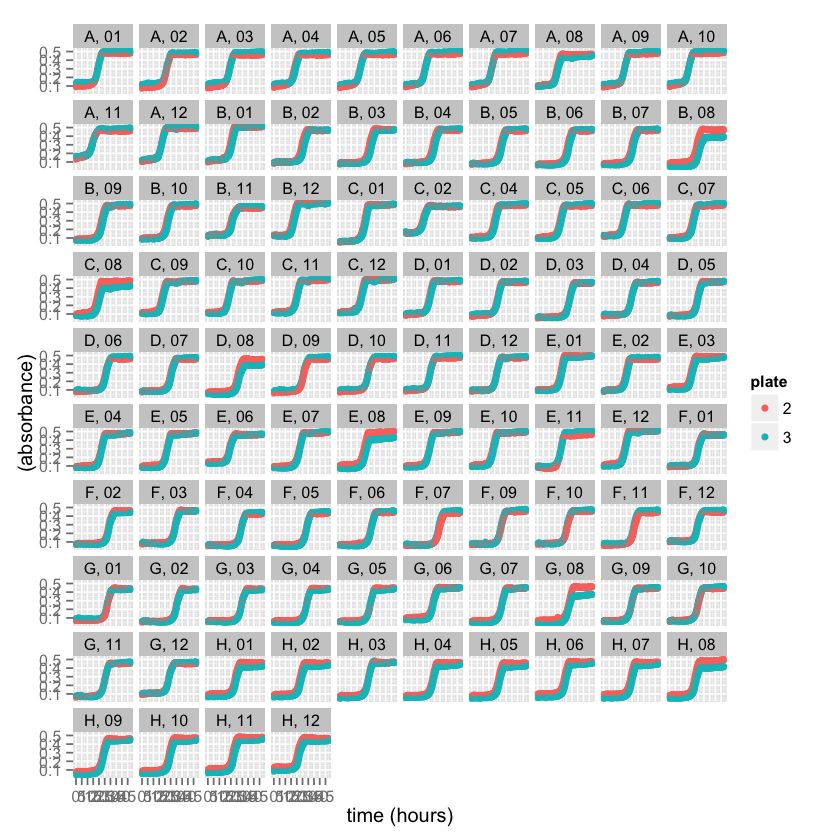

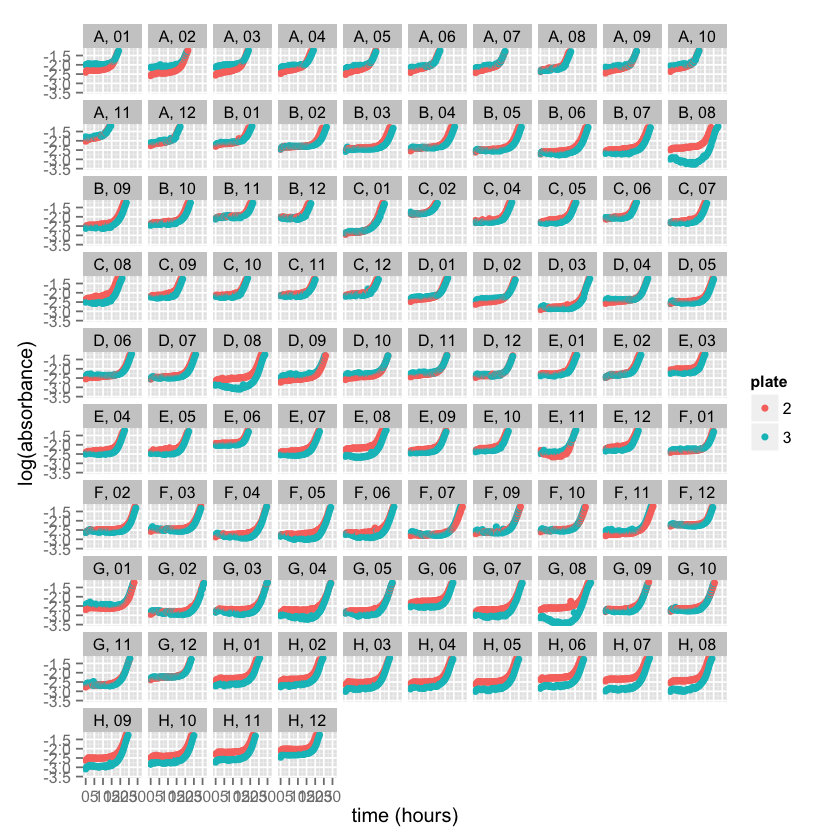

In [5]:
#Plots growth curves before and after trimming
growth_curves_raw = ggplot(melted_data,aes(x=time,y=(absorbance),colour=plate))+
  geom_point(stat="identity")+
  scale_x_continuous(breaks = round(seq(min(melted_data$time), max(melted_data$time), by = 5),1))+ 
  facet_wrap(~row+col)+
  xlab('time (hours)')

#trims absorbance values to remove late exponential and stationary phase points

melted_data = subset(melted_data,melted_data$absorbance<=0.3)


growth_curves_trimmed = ggplot(melted_data,aes(x=time,y=log(absorbance),colour=plate))+
  geom_point(stat="identity")+
  scale_x_continuous(breaks = round(seq(min(melted_data$time), max(melted_data$time), by = 5),1))+ 
  facet_wrap(~row+col)+
  xlab('time (hours)')


growth_curves_raw
growth_curves_trimmed

In [6]:
#Cast data frame back into wide format
cast_data=dcast(data=melted_data,row*col*plate~time,value.var="absorbance")
head(cast_data)

,row,col,plate,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31
1,A,01,2,0.09045982,0.09845982,0.1004598,0.1014598,0.1014598,0.1024598,0.1014598,0.1014598,0.1014598,0.1004598,0.1004598,0.1004598,0.1034598,0.1014598,0.1004598,0.1014598,0.1024598,0.1034598,0.1034598,0.1044598,0.1054598,0.1064598,0.1074598,0.1094598,0.1104598,0.1124598,0.1144598,0.1184598,0.1204598,0.1254598,0.1304598,0.1394598,0.1494598,0.1644598,0.1854598,0.2114598,0.2404598,0.2714598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,A,01,3,0.1334598,0.1384598,0.1414598,0.1414598,0.1414598,0.1414598,0.1384598,0.1394598,0.1384598,0.1414598,0.1394598,0.1404598,0.1434598,0.1394598,0.1364598,0.1394598,0.1374598,0.1364598,0.1364598,0.1364598,0.1364598,0.1374598,0.1374598,0.1394598,0.1394598,0.1404598,0.1434598,0.1434598,0.1464598,0.1494598,0.1544598,0.1574598,0.1634598,0.1734598,0.1884598,0.2074598,0.2274598,0.2554598,0.2864598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,A,02,2,0.07545982,0.07945982,0.08145982,0.08345982,0.08345982,0.08345982,0.08345982,0.08745982,0.08745982,0.08845982,0.08845982,0.08745982,0.08645982,0.08645982,0.08645982,0.08745982,0.08645982,0.08745982,0.08745982,0.08845982,0.08845982,0.08945982,0.09045982,0.09145982,0.09145982,0.09345982,0.09545982,0.09645982,0.09745982,0.09845982,0.1014598,0.1054598,0.1084598,0.1124598,0.1184598,0.1234598,0.1324598,0.1444598,0.1594598,0.1804598,0.2034598,0.2314598,0.2604598,0.2934598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,A,02,3,0.1184598,0.1174598,0.1194598,0.1174598,0.1184598,0.1194598,0.1214598,0.1244598,0.1234598,0.1244598,0.1294598,0.1364598,0.1234598,0.1264598,0.1254598,0.1244598,0.1254598,0.1254598,0.1264598,0.1234598,0.1244598,0.1244598,0.1254598,0.1274598,0.1274598,0.1274598,0.1314598,0.1294598,0.1324598,0.1384598,0.1394598,0.1364598,0.1374598,0.1424598,0.1454598,0.1524598,0.1584598,0.1694598,0.1814598,0.2024598,0.2244598,0.2524598,0.2804598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,A,03,2,0.07745982,0.08245982,0.08545982,0.08545982,0.08545982,0.08645982,0.08745982,0.08745982,0.08845982,0.09245982,0.09245982,0.09245982,0.09345982,0.09345982,0.09345982,0.09445982,0.09545982,0.09745982,0.09745982,0.09845982,0.1004598,0.1034598,0.1034598,0.1054598,0.1074598,0.1094598,0.1114598,0.1154598,0.1194598,0.1254598,0.1324598,0.1444598,0.1574598,0.1774598,0.2004598,0.2264598,0.2604598,0.2904598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,A,03,3,0.1184598,0.1224598,0.1254598,0.1264598,0.1274598,0.1264598,0.1274598,0.1274598,0.1324598,0.1334598,0.1354598,0.1344598,0.1324598,0.1354598,0.1354598,0.1354598,0.1364598,0.1364598,0.1344598,0.1344598,0.1354598,0.1354598,0.1364598,0.1404598,0.1384598,0.1414598,0.1434598,0.1414598,0.1474598,0.1464598,0.1554598,0.1594598,0.1664598,0.1784598,0.1924598,0.2114598,0.2334598,0.2604598,0.2934598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [7]:
######Estimate lag and other parameters 


#Declare function to apply along rows
lag_estimate = function(row) {
    x = seq(from=0,along.with = row)*(measurement_interval)
    not_na = !is.na(row)
    x = x[not_na]
    y = row[not_na]
    
    piece_model= try(segmented(lm(log(y)~x),seg.Z=~x,k=20,psi=3),silent=T)
        if (class(piece_model)[1]=="segmented") {


            lag = piece_model$psi[2]
            conf_int = confint(piece_model)


            growth_x = subset(x,x>lag)
            growth_y = subset(y,x>lag)
            n=length(growth_x)
    
            model = lm(log(growth_y)~growth_x)
    
            slope = cov(growth_x,log(growth_y))/var(growth_x)
            intercept = mean(log(growth_y))-mean(growth_x)*slope
            predicted = growth_x*slope+intercept
    
            SS_total = sum((log(growth_y)-mean(log(growth_y)))^2)
            SS_resid = sum((log(growth_y)-predicted)^2)
            SS_exp = sum((mean(log(growth_y))-predicted)^2)
            r_squared = 1-(SS_resid/SS_total)
            foldx = max(y)/min(y)
            std_err = sqrt(SS_resid/(n-2))/sqrt(sum((growth_x-mean(growth_x))^2))


            ci_up = slope+(qt(0.975,n-2)*std_err)
            ci_low = slope-(qt(0.975,n-2)*std_err)
            return(c(lag,conf_int$x[2],conf_int$x[3],slope,ci_up,ci_low,r_squared,foldx))
            }

        else {
            return(c(NA,NA,NA,NA,NA,NA,NA,NA))
        }
}
    
absorbances = cast_data[,4:dim(cast_data)[2]]
head(absorbances)

lags = apply(absorbances,1,lag_estimate)
lags = as.data.frame(t(lags))
colnames(lags)=c('lag','lag_upper','lag_lower','new_rate','rate_lower','rate_upper','new_r_sq','new_foldx')
head(lags)
data = cbind(cast_data,lags)
head(data)

,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31
1,0.09045982,0.09845982,0.1004598,0.1014598,0.1014598,0.1024598,0.1014598,0.1014598,0.1014598,0.1004598,0.1004598,0.1004598,0.1034598,0.1014598,0.1004598,0.1014598,0.1024598,0.1034598,0.1034598,0.1044598,0.1054598,0.1064598,0.1074598,0.1094598,0.1104598,0.1124598,0.1144598,0.1184598,0.1204598,0.1254598,0.1304598,0.1394598,0.1494598,0.1644598,0.1854598,0.2114598,0.2404598,0.2714598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,0.1334598,0.1384598,0.1414598,0.1414598,0.1414598,0.1414598,0.1384598,0.1394598,0.1384598,0.1414598,0.1394598,0.1404598,0.1434598,0.1394598,0.1364598,0.1394598,0.1374598,0.1364598,0.1364598,0.1364598,0.1364598,0.1374598,0.1374598,0.1394598,0.1394598,0.1404598,0.1434598,0.1434598,0.1464598,0.1494598,0.1544598,0.1574598,0.1634598,0.1734598,0.1884598,0.2074598,0.2274598,0.2554598,0.2864598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,0.07545982,0.07945982,0.08145982,0.08345982,0.08345982,0.08345982,0.08345982,0.08745982,0.08745982,0.08845982,0.08845982,0.08745982,0.08645982,0.08645982,0.08645982,0.08745982,0.08645982,0.08745982,0.08745982,0.08845982,0.08845982,0.08945982,0.09045982,0.09145982,0.09145982,0.09345982,0.09545982,0.09645982,0.09745982,0.09845982,0.1014598,0.1054598,0.1084598,0.1124598,0.1184598,0.1234598,0.1324598,0.1444598,0.1594598,0.1804598,0.2034598,0.2314598,0.2604598,0.2934598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,0.1184598,0.1174598,0.1194598,0.1174598,0.1184598,0.1194598,0.1214598,0.1244598,0.1234598,0.1244598,0.1294598,0.1364598,0.1234598,0.1264598,0.1254598,0.1244598,0.1254598,0.1254598,0.1264598,0.1234598,0.1244598,0.1244598,0.1254598,0.1274598,0.1274598,0.1274598,0.1314598,0.1294598,0.1324598,0.1384598,0.1394598,0.1364598,0.1374598,0.1424598,0.1454598,0.1524598,0.1584598,0.1694598,0.1814598,0.2024598,0.2244598,0.2524598,0.2804598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,0.07745982,0.08245982,0.08545982,0.08545982,0.08545982,0.08645982,0.08745982,0.08745982,0.08845982,0.09245982,0.09245982,0.09245982,0.09345982,0.09345982,0.09345982,0.09445982,0.09545982,0.09745982,0.09745982,0.09845982,0.1004598,0.1034598,0.1034598,0.1054598,0.1074598,0.1094598,0.1114598,0.1154598,0.1194598,0.1254598,0.1324598,0.1444598,0.1574598,0.1774598,0.2004598,0.2264598,0.2604598,0.2904598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,0.1184598,0.1224598,0.1254598,0.1264598,0.1274598,0.1264598,0.1274598,0.1274598,0.1324598,0.1334598,0.1354598,0.1344598,0.1324598,0.1354598,0.1354598,0.1354598,0.1364598,0.1364598,0.1344598,0.1344598,0.1354598,0.1354598,0.1364598,0.1404598,0.1384598,0.1414598,0.1434598,0.1414598,0.1474598,0.1464598,0.1554598,0.1594598,0.1664598,0.1784598,0.1924598,0.2114598,0.2334598,0.2604598,0.2934598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,lag,lag_upper,lag_lower,new_rate,rate_lower,rate_upper,new_r_sq,new_foldx
1,14.65935,14.38,14.94,0.2146266,0.2406068,0.1886465,0.985529,3.000888
2,15.2347,14.97,15.5,0.1745386,0.1997751,0.1493021,0.9794797,2.146412
3,16.66781,16.38,16.95,0.2100847,0.230829,0.1893403,0.9855437,3.888955
4,17.22294,16.93,17.52,0.1797193,0.2057041,0.1537345,0.9794808,2.387709
5,14.31888,14.12,14.52,0.2175667,0.2383611,0.1967724,0.9886932,3.749813
6,15.30889,15.08,15.53,0.1763858,0.1996501,0.1531214,0.9828657,2.477294


,row,col,plate,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,lag,lag_upper,lag_lower,new_rate,rate_lower,rate_upper,new_r_sq,new_foldx
1,A,01,2,0.09045982,0.09845982,0.1004598,0.1014598,0.1014598,0.1024598,0.1014598,0.1014598,0.1014598,0.1004598,0.1004598,0.1004598,0.1034598,0.1014598,0.1004598,0.1014598,0.1024598,0.1034598,0.1034598,0.1044598,0.1054598,0.1064598,0.1074598,0.1094598,0.1104598,0.1124598,0.1144598,0.1184598,0.1204598,0.1254598,0.1304598,0.1394598,0.1494598,0.1644598,0.1854598,0.2114598,0.2404598,0.2714598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,14.65935,14.38,14.94,0.2146266,0.2406068,0.1886465,0.985529,3.000888
2,A,01,3,0.1334598,0.1384598,0.1414598,0.1414598,0.1414598,0.1414598,0.1384598,0.1394598,0.1384598,0.1414598,0.1394598,0.1404598,0.1434598,0.1394598,0.1364598,0.1394598,0.1374598,0.1364598,0.1364598,0.1364598,0.1364598,0.1374598,0.1374598,0.1394598,0.1394598,0.1404598,0.1434598,0.1434598,0.1464598,0.1494598,0.1544598,0.1574598,0.1634598,0.1734598,0.1884598,0.2074598,0.2274598,0.2554598,0.2864598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,15.2347,14.97,15.5,0.1745386,0.1997751,0.1493021,0.9794797,2.146412
3,A,02,2,0.07545982,0.07945982,0.08145982,0.08345982,0.08345982,0.08345982,0.08345982,0.08745982,0.08745982,0.08845982,0.08845982,0.08745982,0.08645982,0.08645982,0.08645982,0.08745982,0.08645982,0.08745982,0.08745982,0.08845982,0.08845982,0.08945982,0.09045982,0.09145982,0.09145982,0.09345982,0.09545982,0.09645982,0.09745982,0.09845982,0.1014598,0.1054598,0.1084598,0.1124598,0.1184598,0.1234598,0.1324598,0.1444598,0.1594598,0.1804598,0.2034598,0.2314598,0.2604598,0.2934598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,16.66781,16.38,16.95,0.2100847,0.230829,0.1893403,0.9855437,3.888955
4,A,02,3,0.1184598,0.1174598,0.1194598,0.1174598,0.1184598,0.1194598,0.1214598,0.1244598,0.1234598,0.1244598,0.1294598,0.1364598,0.1234598,0.1264598,0.1254598,0.1244598,0.1254598,0.1254598,0.1264598,0.1234598,0.1244598,0.1244598,0.1254598,0.1274598,0.1274598,0.1274598,0.1314598,0.1294598,0.1324598,0.1384598,0.1394598,0.1364598,0.1374598,0.1424598,0.1454598,0.1524598,0.1584598,0.1694598,0.1814598,0.2024598,0.2244598,0.2524598,0.2804598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,17.22294,16.93,17.52,0.1797193,0.2057041,0.1537345,0.9794808,2.387709
5,A,03,2,0.07745982,0.08245982,0.08545982,0.08545982,0.08545982,0.08645982,0.08745982,0.08745982,0.08845982,0.09245982,0.09245982,0.09245982,0.09345982,0.09345982,0.09345982,0.09445982,0.09545982,0.09745982,0.09745982,0.09845982,0.1004598,0.1034598,0.1034598,0.1054598,0.1074598,0.1094598,0.1114598,0.1154598,0.1194598,0.1254598,0.1324598,0.1444598,0.1574598,0.1774598,0.2004598,0.2264598,0.2604598,0.2904598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,14.31888,14.12,14.52,0.2175667,0.2383611,0.1967724,0.9886932,3.749813
6,A,03,3,0.1184598,0.1224598,0.1254598,0.1264598,0.1274598,0.1264598,0.1274598,0.1274598,0.1324598,0.1334598,0.1354598,0.1344598,0.1324598,0.1354598,0.1354598,0.1354598,0.1364598,0.1364598,0.1344598,0.1344598,0.1354598,0.1354598,0.1364598,0.1404598,0.1384598,0.1414598,0.1434598,0.1414598,0.1474598,0.1464598,0.1554598,0.1594598,0.1664598,0.1784598,0.1924598,0.2114598,0.2334598,0.2604598,0.2934598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,15.30889,15.08,15.53,0.1763858,0.1996501,0.1531214,0.9828657,2.477294


,row,col,plate,lag,lag_upper,lag_lower,new_rate,rate_lower,rate_upper,new_r_sq,new_foldx,time,absorbance
1,A,01,2,14.65935,14.38,14.94,0.2146266,0.2406068,0.1886465,0.985529,3.000888,0,0.09045982
2,A,01,3,15.2347,14.97,15.5,0.1745386,0.1997751,0.1493021,0.9794797,2.146412,0,0.1334598
3,A,02,2,16.66781,16.38,16.95,0.2100847,0.230829,0.1893403,0.9855437,3.888955,0,0.07545982
4,A,02,3,17.22294,16.93,17.52,0.1797193,0.2057041,0.1537345,0.9794808,2.387709,0,0.1184598
5,A,03,2,14.31888,14.12,14.52,0.2175667,0.2383611,0.1967724,0.9886932,3.749813,0,0.07745982
6,A,03,3,15.30889,15.08,15.53,0.1763858,0.1996501,0.1531214,0.9828657,2.477294,0,0.1184598


Warning message:
: Removed 49 rows containing missing values (geom_point).Warning message:
: Removed 39 rows containing missing values (geom_point).Warning message:
: Removed 49 rows containing missing values (geom_point).Warning message:
: Removed 51 rows containing missing values (geom_point).Warning message:
: Removed 54 rows containing missing values (geom_point).Warning message:
: Removed 57 rows containing missing values (geom_point).Warning message:
: Removed 56 rows containing missing values (geom_point).Warning message:
: Removed 56 rows containing missing values (geom_point).Warning message:
: Removed 52 rows containing missing values (geom_point).Warning message:
: Removed 58 rows containing missing values (geom_point).Warning message:
: Removed 68 rows containing missing values (geom_point).Warning message:
: Removed 57 rows containing missing values (geom_point).Warning message:
: Removed 44 rows containing missing values (geom_point).Warning message:
: Removed 23 rows con

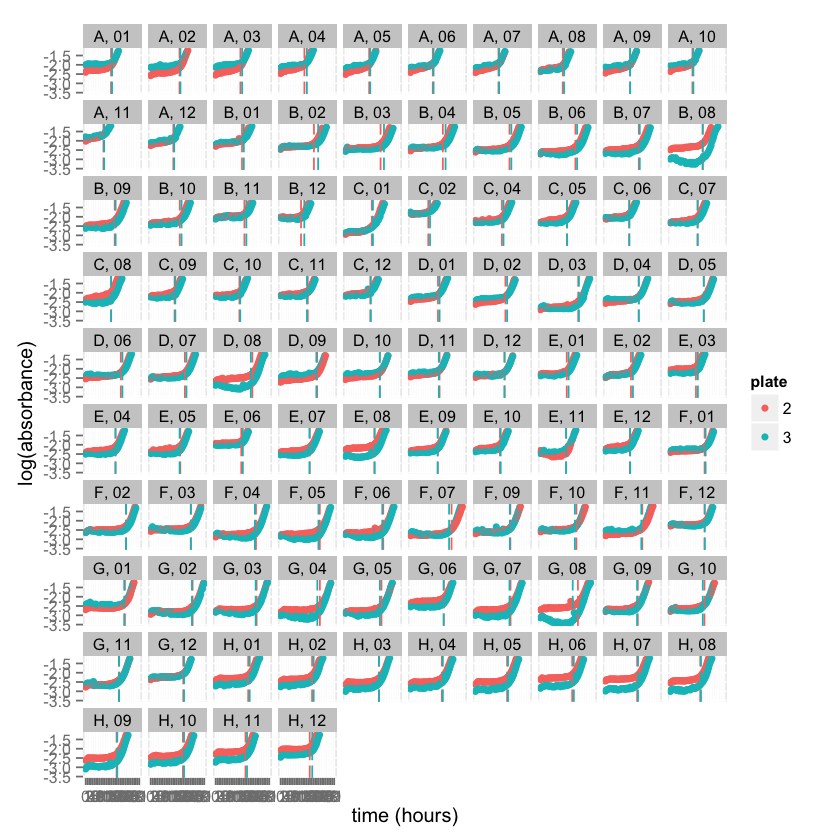

In [8]:
###Plot growth curves along with lag estimates

melted_data = melt(data,id.vars=c('row','col','plate',colnames(lags)),variable.name='time',value.name='absorbance')
melted_data$time = as.numeric(melted_data$time)
melted_data$time = (melted_data$time-1)*measurement_interval

head(melted_data)

lag_plot = ggplot(melted_data,aes(x=time,y=log(absorbance),colour=plate))+
  geom_point(stat="identity")+
  scale_x_continuous(breaks = round(seq(min(melted_data$time), max(melted_data$time), by = 1),1))+ 
  geom_vline(aes(xintercept=lag,colour=plate), linetype = "longdash")+
  facet_wrap(~row*col)+
  xlab('time (hours)')

lag_plot

,row,col,plate,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,lag,lag_upper,lag_lower,new_rate,rate_lower,rate_upper,new_r_sq,new_foldx,OD
1,A,01,2,0.09045982,0.09845982,0.1004598,0.1014598,0.1014598,0.1024598,0.1014598,0.1014598,0.1014598,0.1004598,0.1004598,0.1004598,0.1034598,0.1014598,0.1004598,0.1014598,0.1024598,0.1034598,0.1034598,0.1044598,0.1054598,0.1064598,0.1074598,0.1094598,0.1104598,0.1124598,0.1144598,0.1184598,0.1204598,0.1254598,0.1304598,0.1394598,0.1494598,0.1644598,0.1854598,0.2114598,0.2404598,0.2714598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,14.65935,14.38,14.94,0.2146266,0.2406068,0.1886465,0.985529,3.000888,0.09045982
2,A,01,3,0.1334598,0.1384598,0.1414598,0.1414598,0.1414598,0.1414598,0.1384598,0.1394598,0.1384598,0.1414598,0.1394598,0.1404598,0.1434598,0.1394598,0.1364598,0.1394598,0.1374598,0.1364598,0.1364598,0.1364598,0.1364598,0.1374598,0.1374598,0.1394598,0.1394598,0.1404598,0.1434598,0.1434598,0.1464598,0.1494598,0.1544598,0.1574598,0.1634598,0.1734598,0.1884598,0.2074598,0.2274598,0.2554598,0.2864598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,15.2347,14.97,15.5,0.1745386,0.1997751,0.1493021,0.9794797,2.146412,0.1334598
3,A,02,2,0.07545982,0.07945982,0.08145982,0.08345982,0.08345982,0.08345982,0.08345982,0.08745982,0.08745982,0.08845982,0.08845982,0.08745982,0.08645982,0.08645982,0.08645982,0.08745982,0.08645982,0.08745982,0.08745982,0.08845982,0.08845982,0.08945982,0.09045982,0.09145982,0.09145982,0.09345982,0.09545982,0.09645982,0.09745982,0.09845982,0.1014598,0.1054598,0.1084598,0.1124598,0.1184598,0.1234598,0.1324598,0.1444598,0.1594598,0.1804598,0.2034598,0.2314598,0.2604598,0.2934598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,16.66781,16.38,16.95,0.2100847,0.230829,0.1893403,0.9855437,3.888955,0.07545982
4,A,02,3,0.1184598,0.1174598,0.1194598,0.1174598,0.1184598,0.1194598,0.1214598,0.1244598,0.1234598,0.1244598,0.1294598,0.1364598,0.1234598,0.1264598,0.1254598,0.1244598,0.1254598,0.1254598,0.1264598,0.1234598,0.1244598,0.1244598,0.1254598,0.1274598,0.1274598,0.1274598,0.1314598,0.1294598,0.1324598,0.1384598,0.1394598,0.1364598,0.1374598,0.1424598,0.1454598,0.1524598,0.1584598,0.1694598,0.1814598,0.2024598,0.2244598,0.2524598,0.2804598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,17.22294,16.93,17.52,0.1797193,0.2057041,0.1537345,0.9794808,2.387709,0.1184598
5,A,03,2,0.07745982,0.08245982,0.08545982,0.08545982,0.08545982,0.08645982,0.08745982,0.08745982,0.08845982,0.09245982,0.09245982,0.09245982,0.09345982,0.09345982,0.09345982,0.09445982,0.09545982,0.09745982,0.09745982,0.09845982,0.1004598,0.1034598,0.1034598,0.1054598,0.1074598,0.1094598,0.1114598,0.1154598,0.1194598,0.1254598,0.1324598,0.1444598,0.1574598,0.1774598,0.2004598,0.2264598,0.2604598,0.2904598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,14.31888,14.12,14.52,0.2175667,0.2383611,0.1967724,0.9886932,3.749813,0.07745982
6,A,03,3,0.1184598,0.1224598,0.1254598,0.1264598,0.1274598,0.1264598,0.1274598,0.1274598,0.1324598,0.1334598,0.1354598,0.1344598,0.1324598,0.1354598,0.1354598,0.1354598,0.1364598,0.1364598,0.1344598,0.1344598,0.1354598,0.1354598,0.1364598,0.1404598,0.1384598,0.1414598,0.1434598,0.1414598,0.1474598,0.1464598,0.1554598,0.1594598,0.1664598,0.1784598,0.1924598,0.2114598,0.2334598,0.2604598,0.2934598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,15.30889,15.08,15.53,0.1763858,0.1996501,0.1531214,0.9828657,2.477294,0.1184598


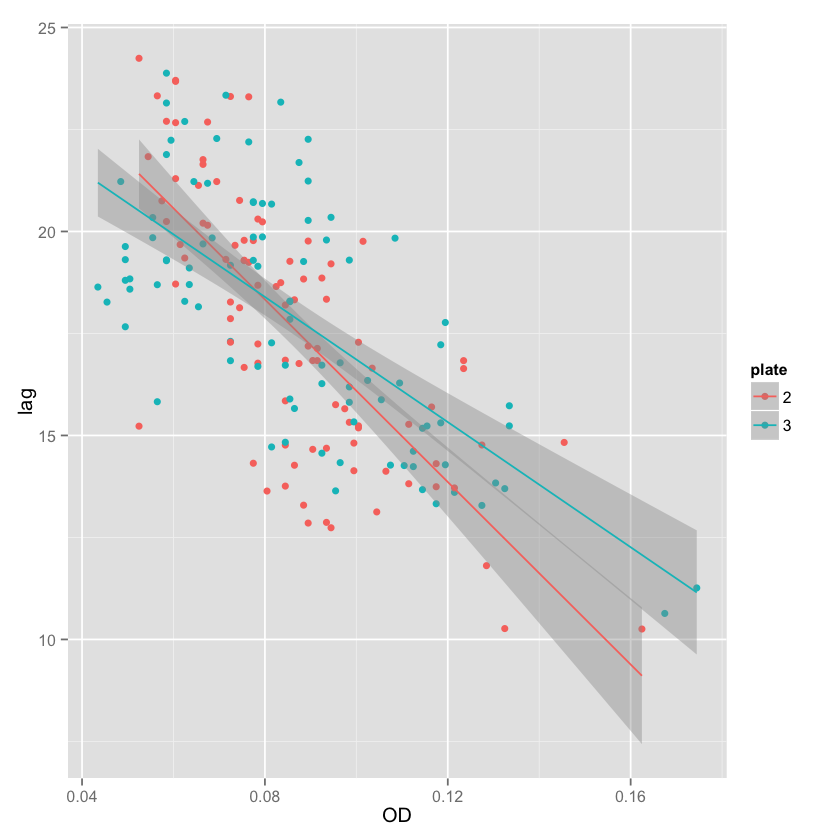

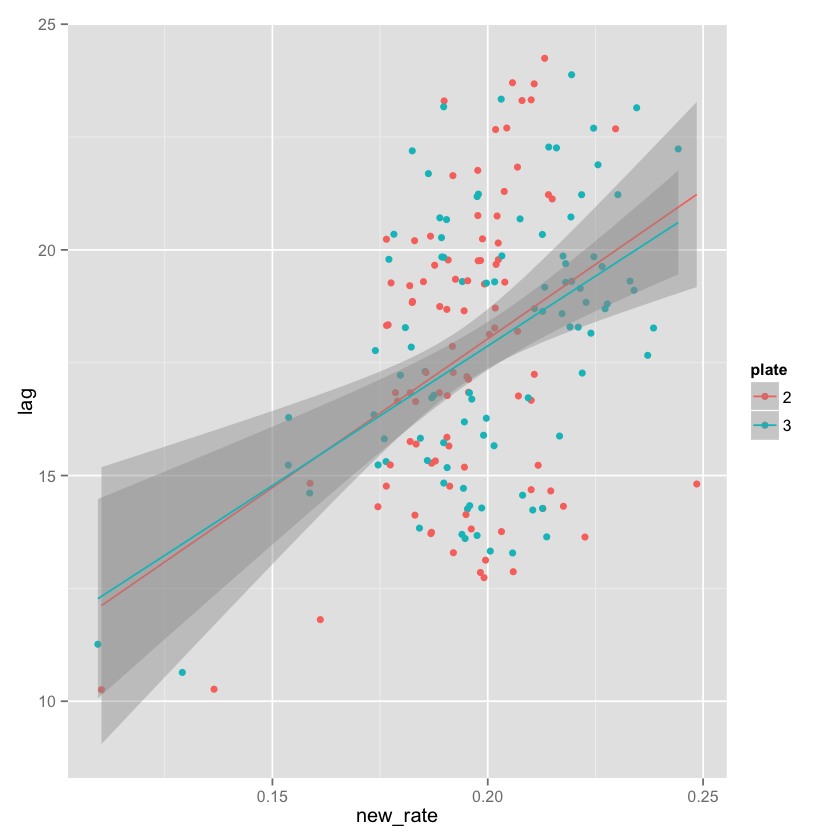

In [9]:
data$OD = data$'0'
head(data)

OD_mod = lm(data$lag~data$OD)
rate_mod = lm(data$lag~data$new_rate)

lag_vs_OD = ggplot(data,aes(x=OD,y=lag,colour = plate))+
    geom_point()+
    geom_smooth(method='lm')
    #geom_abline(slope=OD_mod$coefficients[2],intercept=OD_mod$coefficients[1])
lag_vs_OD

rate_vs_lag = ggplot(data,aes(x=new_rate,y=lag,colour = plate))+
    geom_point()+
    geom_smooth(method='lm')
    #geom_abline(slope=rate_mod$coefficients[2],intercept=rate_mod$coefficients[1])
rate_vs_lag

,row,col,plate,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,lag,lag_upper,lag_lower,new_rate,rate_lower,rate_upper,new_r_sq,new_foldx,OD
1,A,01,2,0.09045982,0.09845982,0.1004598,0.1014598,0.1014598,0.1024598,0.1014598,0.1014598,0.1014598,0.1004598,0.1004598,0.1004598,0.1034598,0.1014598,0.1004598,0.1014598,0.1024598,0.1034598,0.1034598,0.1044598,0.1054598,0.1064598,0.1074598,0.1094598,0.1104598,0.1124598,0.1144598,0.1184598,0.1204598,0.1254598,0.1304598,0.1394598,0.1494598,0.1644598,0.1854598,0.2114598,0.2404598,0.2714598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,14.65935,14.38,14.94,0.2146266,0.2406068,0.1886465,0.985529,3.000888,0.09045982
2,A,01,3,0.1334598,0.1384598,0.1414598,0.1414598,0.1414598,0.1414598,0.1384598,0.1394598,0.1384598,0.1414598,0.1394598,0.1404598,0.1434598,0.1394598,0.1364598,0.1394598,0.1374598,0.1364598,0.1364598,0.1364598,0.1364598,0.1374598,0.1374598,0.1394598,0.1394598,0.1404598,0.1434598,0.1434598,0.1464598,0.1494598,0.1544598,0.1574598,0.1634598,0.1734598,0.1884598,0.2074598,0.2274598,0.2554598,0.2864598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,15.2347,14.97,15.5,0.1745386,0.1997751,0.1493021,0.9794797,2.146412,0.1334598
3,A,02,2,0.07545982,0.07945982,0.08145982,0.08345982,0.08345982,0.08345982,0.08345982,0.08745982,0.08745982,0.08845982,0.08845982,0.08745982,0.08645982,0.08645982,0.08645982,0.08745982,0.08645982,0.08745982,0.08745982,0.08845982,0.08845982,0.08945982,0.09045982,0.09145982,0.09145982,0.09345982,0.09545982,0.09645982,0.09745982,0.09845982,0.1014598,0.1054598,0.1084598,0.1124598,0.1184598,0.1234598,0.1324598,0.1444598,0.1594598,0.1804598,0.2034598,0.2314598,0.2604598,0.2934598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,16.66781,16.38,16.95,0.2100847,0.230829,0.1893403,0.9855437,3.888955,0.07545982
4,A,02,3,0.1184598,0.1174598,0.1194598,0.1174598,0.1184598,0.1194598,0.1214598,0.1244598,0.1234598,0.1244598,0.1294598,0.1364598,0.1234598,0.1264598,0.1254598,0.1244598,0.1254598,0.1254598,0.1264598,0.1234598,0.1244598,0.1244598,0.1254598,0.1274598,0.1274598,0.1274598,0.1314598,0.1294598,0.1324598,0.1384598,0.1394598,0.1364598,0.1374598,0.1424598,0.1454598,0.1524598,0.1584598,0.1694598,0.1814598,0.2024598,0.2244598,0.2524598,0.2804598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,17.22294,16.93,17.52,0.1797193,0.2057041,0.1537345,0.9794808,2.387709,0.1184598
5,A,03,2,0.07745982,0.08245982,0.08545982,0.08545982,0.08545982,0.08645982,0.08745982,0.08745982,0.08845982,0.09245982,0.09245982,0.09245982,0.09345982,0.09345982,0.09345982,0.09445982,0.09545982,0.09745982,0.09745982,0.09845982,0.1004598,0.1034598,0.1034598,0.1054598,0.1074598,0.1094598,0.1114598,0.1154598,0.1194598,0.1254598,0.1324598,0.1444598,0.1574598,0.1774598,0.2004598,0.2264598,0.2604598,0.2904598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,14.31888,14.12,14.52,0.2175667,0.2383611,0.1967724,0.9886932,3.749813,0.07745982
6,A,03,3,0.1184598,0.1224598,0.1254598,0.1264598,0.1274598,0.1264598,0.1274598,0.1274598,0.1324598,0.1334598,0.1354598,0.1344598,0.1324598,0.1354598,0.1354598,0.1354598,0.1364598,0.1364598,0.1344598,0.1344598,0.1354598,0.1354598,0.1364598,0.1404598,0.1384598,0.1414598,0.1434598,0.1414598,0.1474598,0.1464598,0.1554598,0.1594598,0.1664598,0.1784598,0.1924598,0.2114598,0.2334598,0.2604598,0.2934598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,15.30889,15.08,15.53,0.1763858,0.1996501,0.1531214,0.9828657,2.477294,0.1184598


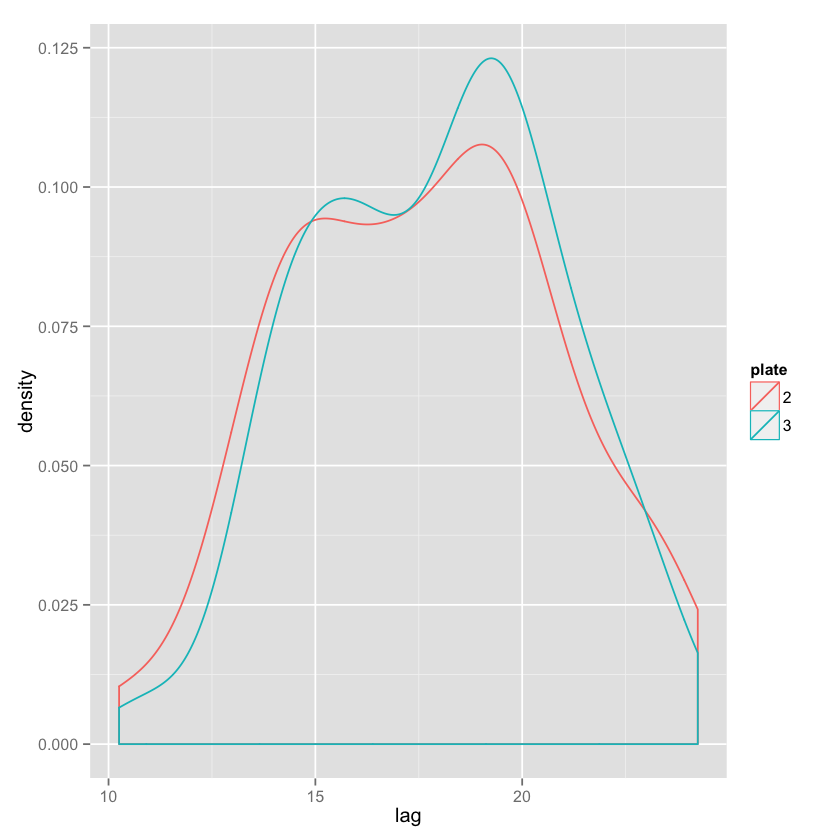

In [10]:
head(data)
lag_hist = ggplot(data,aes(x=lag,colour=plate))+
    geom_density()

lag_hist

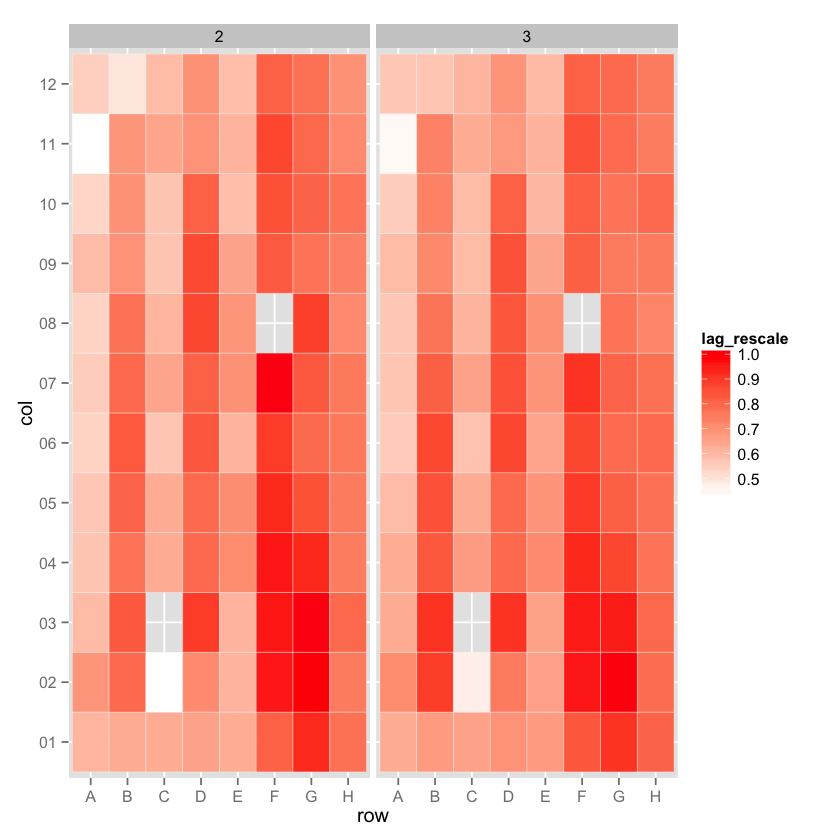

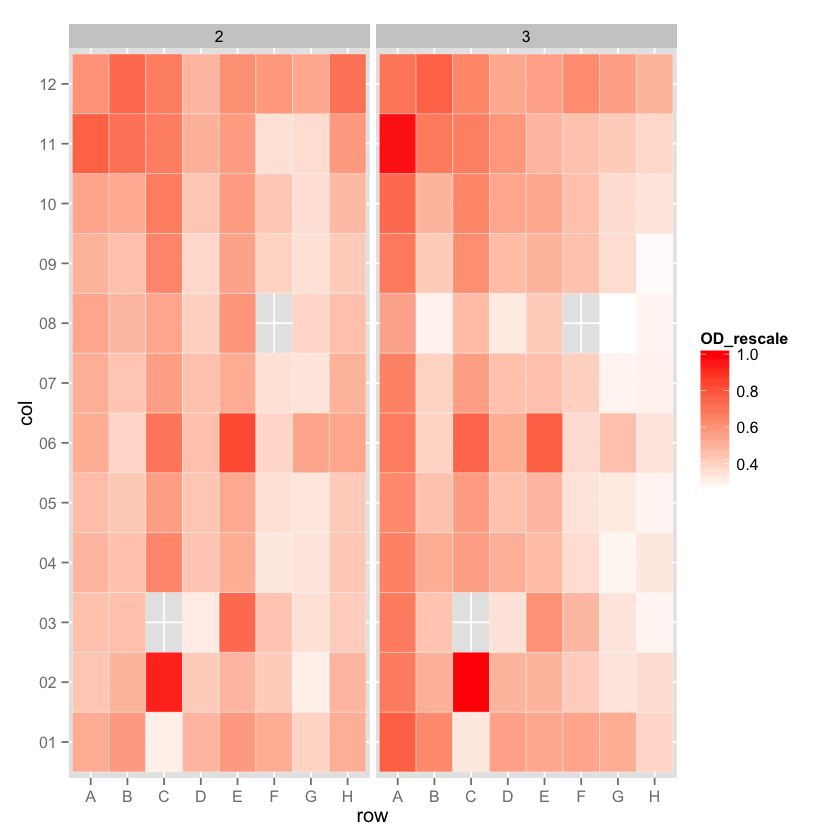

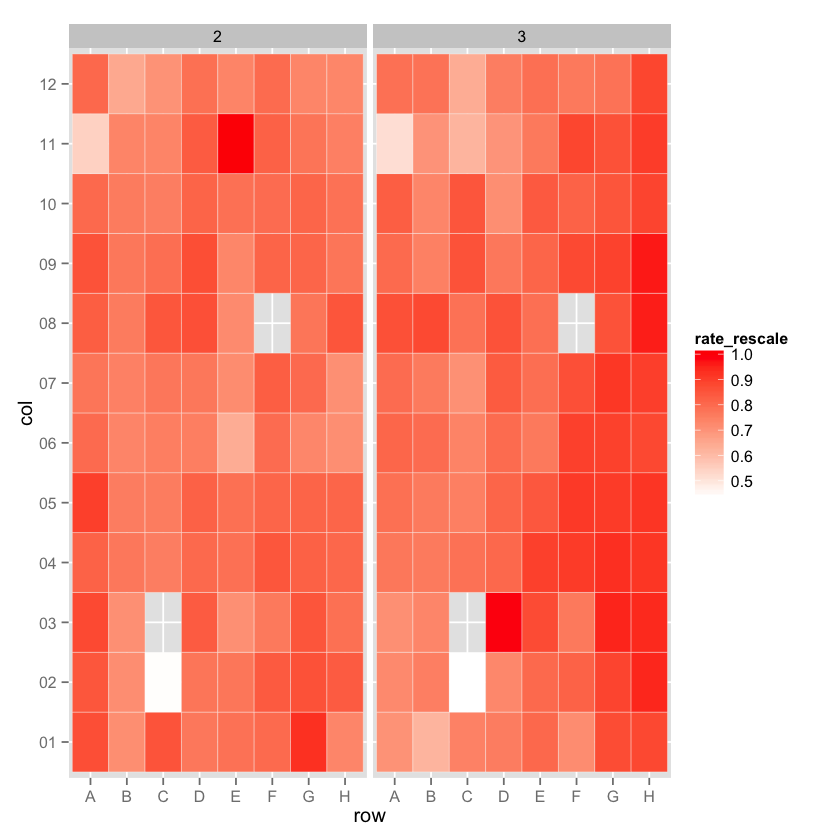

In [11]:
####Produce heat maps to visualize any plate effects on lag time or growth rate

#rescale data by maximum value for better heat map visualization
data$lag_rescale= data$lag/max(data$lag,na.rm=T)
data$rate_rescale = data$new_rate/max(data$new_rate,na.rm=T)
data$OD_rescale = data$OD/max(data$OD,na.rm=T)

lag_heat = ggplot(data,aes(x=row,y=col))+
    geom_tile(aes(fill = lag_rescale),  colour = "white") + 
    scale_fill_gradient(low = "white", high = "red")+
    facet_wrap(~plate)
OD_heat = ggplot(data,aes(x=row,y=col))+
    geom_tile(aes(fill = OD_rescale),  colour = "white") + 
    scale_fill_gradient(low = "white", high = "red")+
    facet_wrap(~plate)

rate_heat = ggplot(data,aes(x=row,y=col))+
    geom_tile(aes(fill = rate_rescale),  colour = "white") + 
    scale_fill_gradient(low = "white", high = "red")+
    facet_wrap(~plate)



lag_heat
OD_heat
rate_heat



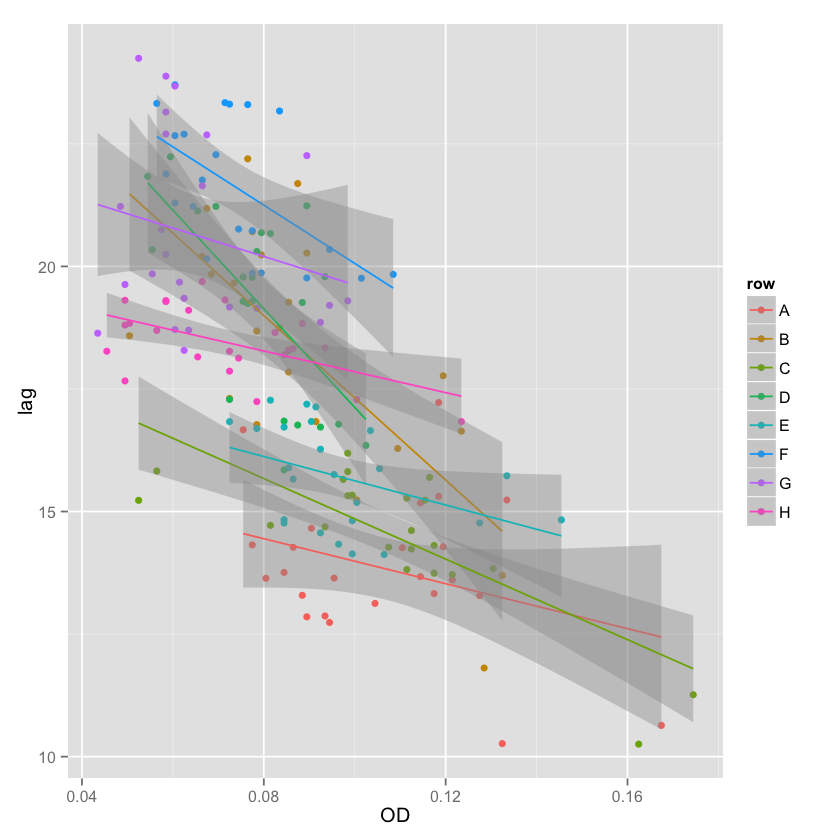

In [12]:
lag_vs_OD = ggplot(data,aes(x=OD,y=lag,colour = row))+
    geom_point()+
    geom_smooth(method='lm')
    #geom_abline(slope=OD_mod$coefficients[2],intercept=OD_mod$coefficients[1])
lag_vs_OD

,row,col,plate,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,lag,lag_upper,lag_lower,new_rate,rate_lower,rate_upper,new_r_sq,new_foldx,OD,lag_rescale,rate_rescale,OD_rescale
1,A,01,2,0.09045982,0.09845982,0.1004598,0.1014598,0.1014598,0.1024598,0.1014598,0.1014598,0.1014598,0.1004598,0.1004598,0.1004598,0.1034598,0.1014598,0.1004598,0.1014598,0.1024598,0.1034598,0.1034598,0.1044598,0.1054598,0.1064598,0.1074598,0.1094598,0.1104598,0.1124598,0.1144598,0.1184598,0.1204598,0.1254598,0.1304598,0.1394598,0.1494598,0.1644598,0.1854598,0.2114598,0.2404598,0.2714598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,14.65935,14.38,14.94,0.2146266,0.2406068,0.1886465,0.985529,3.000888,0.09045982,0.6046418,0.863576,0.5185138
2,A,01,3,0.1334598,0.1384598,0.1414598,0.1414598,0.1414598,0.1414598,0.1384598,0.1394598,0.1384598,0.1414598,0.1394598,0.1404598,0.1434598,0.1394598,0.1364598,0.1394598,0.1374598,0.1364598,0.1364598,0.1364598,0.1364598,0.1374598,0.1374598,0.1394598,0.1394598,0.1404598,0.1434598,0.1434598,0.1464598,0.1494598,0.1544598,0.1574598,0.1634598,0.1734598,0.1884598,0.2074598,0.2274598,0.2554598,0.2864598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,15.2347,14.97,15.5,0.1745386,0.1997751,0.1493021,0.9794797,2.146412,0.1334598,0.6283726,0.702277,0.7649889
3,A,02,2,0.07545982,0.07945982,0.08145982,0.08345982,0.08345982,0.08345982,0.08345982,0.08745982,0.08745982,0.08845982,0.08845982,0.08745982,0.08645982,0.08645982,0.08645982,0.08745982,0.08645982,0.08745982,0.08745982,0.08845982,0.08845982,0.08945982,0.09045982,0.09145982,0.09145982,0.09345982,0.09545982,0.09645982,0.09745982,0.09845982,0.1014598,0.1054598,0.1084598,0.1124598,0.1184598,0.1234598,0.1324598,0.1444598,0.1594598,0.1804598,0.2034598,0.2314598,0.2604598,0.2934598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,16.66781,16.38,16.95,0.2100847,0.230829,0.1893403,0.9855437,3.888955,0.07545982,0.6874832,0.8453008,0.4325341
4,A,02,3,0.1184598,0.1174598,0.1194598,0.1174598,0.1184598,0.1194598,0.1214598,0.1244598,0.1234598,0.1244598,0.1294598,0.1364598,0.1234598,0.1264598,0.1254598,0.1244598,0.1254598,0.1254598,0.1264598,0.1234598,0.1244598,0.1244598,0.1254598,0.1274598,0.1274598,0.1274598,0.1314598,0.1294598,0.1324598,0.1384598,0.1394598,0.1364598,0.1374598,0.1424598,0.1454598,0.1524598,0.1584598,0.1694598,0.1814598,0.2024598,0.2244598,0.2524598,0.2804598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,17.22294,16.93,17.52,0.1797193,0.2057041,0.1537345,0.9794808,2.387709,0.1184598,0.7103798,0.7231222,0.6790092
5,A,03,2,0.07745982,0.08245982,0.08545982,0.08545982,0.08545982,0.08645982,0.08745982,0.08745982,0.08845982,0.09245982,0.09245982,0.09245982,0.09345982,0.09345982,0.09345982,0.09445982,0.09545982,0.09745982,0.09745982,0.09845982,0.1004598,0.1034598,0.1034598,0.1054598,0.1074598,0.1094598,0.1114598,0.1154598,0.1194598,0.1254598,0.1324598,0.1444598,0.1574598,0.1774598,0.2004598,0.2264598,0.2604598,0.2904598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,14.31888,14.12,14.52,0.2175667,0.2383611,0.1967724,0.9886932,3.749813,0.07745982,0.5905987,0.8754059,0.4439981
6,A,03,3,0.1184598,0.1224598,0.1254598,0.1264598,0.1274598,0.1264598,0.1274598,0.1274598,0.1324598,0.1334598,0.1354598,0.1344598,0.1324598,0.1354598,0.1354598,0.1354598,0.1364598,0.1364598,0.1344598,0.1344598,0.1354598,0.1354598,0.1364598,0.1404598,0.1384598,0.1414598,0.1434598,0.1414598,0.1474598,0.1464598,0.1554598,0.1594598,0.1664598,0.1784598,0.1924598,0.2114598,0.2334598,0.2604598,0.2934598,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,15.30889,15.08,15.53,0.1763858,0.1996501,0.1531214,0.9828657,2.477294,0.1184598,0.6314329,0.7097092,0.6790092


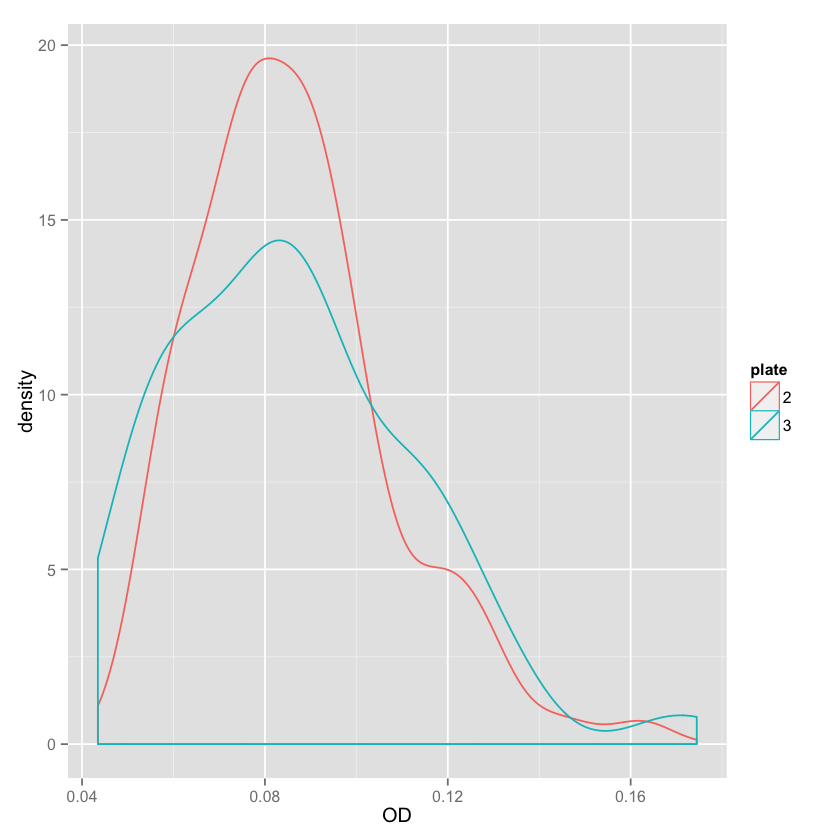

In [13]:
head(data)
OD_hist = ggplot(data,aes(x=OD,colour=plate))+
    geom_density()
OD_hist

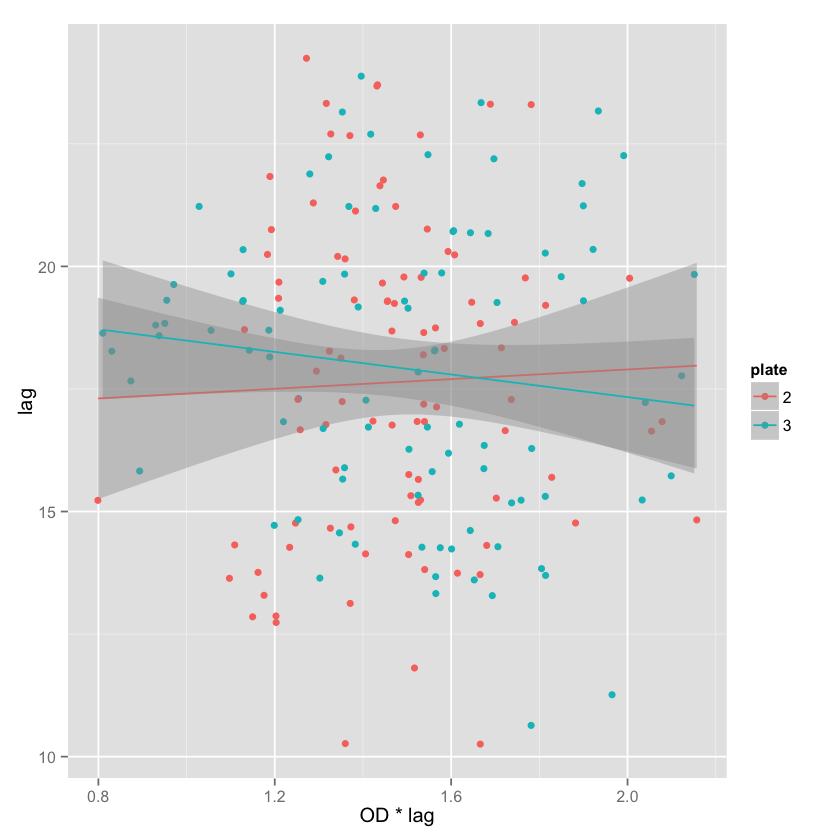

In [16]:
scaled_OD = ggplot(data,aes(x=OD,y=lag*OD,colour = plate))+
    geom_point()+
    geom_smooth(method="lm")

scaled_OD